## Convolutional Neural Networks - Implementation

Your goal in this project is to classify handwritten digits using Convolutional Neural Networks. Here are a few examples of images from the input data:

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

As output labels, we have a set of integer values ranging from 0 to 9. We are going to follow those steps in this notebook:

1. **Prepare the input data**
2. **Creating a simple fully connected model**
3. **Extending to CNNs**
4. **Visualizing Predictions**

As a summary, three new classes/modules are going to be used:
- [`tf.keras.layers.Flatten`](https://keras.io/layers/core/)
    - Flattens the input. Does not affect the batch size.
- [`tf.keras.layers.Conv2D`](https://keras.io/layers/convolutional/)
    - 2D convolution layer
- [`tf.keras.layers.MaxPooling2D`](https://keras.io/layers/pooling/)
    - Max pooling operation for spatial data.




### 1. Preparing the input data

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

Now, let's normalize the data using standardization:

In [8]:
x_mean = X_train.mean()
x_mean

33.318421449829934

In [9]:
x_std = X_train.std()
x_std

78.56748998339798

In [10]:
X_train_norm = (X_train - x_mean) / x_std

In [12]:
X_train_norm.mean()

-3.064638490070051e-17

In [11]:
X_train_norm.std()

0.9999999999999998

In [ ]:
X_test_norm = (X_test - x_mean) / x_std
X_test_norm

Normalisation is required so that all the inputs are at a comparable range.
Say there are two inputs to your ann, x1 and x2. x1 varies from to 0 to 0.5 and x2 varies from 0 to 1000. A change of x1 of 0.5  is 100 percent change where as a change of x2 by 0.5 is only a change of 0.05%. Hence normalization helps. 

### 2. Training using only Fully Connected layers first

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [33]:
model = Sequential([
                    Flatten(input_shape = (28,28)),
                    Dense(400, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

In [24]:
Flatten?

In [34]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 400)               314000    
                                                                 
 dense_9 (Dense)             (None, 10)                4010      
                                                                 
Total params: 318,010
Trainable params: 318,010
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [41]:
hist = model.fit(X_train_norm,
          y_train, 
          validation_data=(X_test_norm, y_test),
          epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1232 - accuracy: 0.9628 - val_loss: 0.0898 - val_accuracy: 0.9728
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0619 - accuracy: 0.9807 - val_loss: 0.0812 - val_accuracy: 0.9742
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0463 - accuracy: 0.9857 - val_loss: 0.0781 - val_accuracy: 0.9758
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0740 - val_accuracy: 0.9796
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.0920 - val_accuracy: 0.9736
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0937 - val_accuracy: 0.9754
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0194 - accuracy: 0.9936 - val_loss: 0.0837 - val_accuracy:

### 3. Extending to CNNs


Now, let's replicate the same architecture from the visualization provided on the previous video:
![Screen Shot 2019-05-14 at 12 58 15](https://user-images.githubusercontent.com/5733246/57713463-e8627400-7648-11e9-8c64-3745519dbb20.png)

The analog architecture that is going to be used is:
- Conv. Layer with 6 filters
- Maxpooling
- Conv. Layer with 16 filters
- Maxpooling
- Fully connected layer with 120 units
- Fully connected layer with 100 units
- Output layer with 10 units


#### Convolutional Model

In [45]:
from tensorflow.keras.layers import Conv2D

In [42]:
X_train[0].shape


(28, 28)

In [46]:
conv = Conv2D(1, kernel_size=(3,3))

In [47]:
x = X_train_norm[0].reshape(1,28,28,1)

In [61]:
from tensorflow.keras.layers import MaxPool2D

In [68]:
model = Sequential([
                    Conv2D(6,kernel_size=(3,3),input_shape=(28,28,1), activation = 'relu'), 
                    MaxPool2D(),      
                    Conv2D(16,kernel_size=(3,3), activation = 'relu'),
                    MaxPool2D(),                                            
                    Flatten(),
                    Dense(120, activation='relu'),
                    Dense(100, activation='relu'),
                    Dense(10, activation='softmax')
])

In [69]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_13 (Flatten)        (None, 400)               0         
                                                                 
 dense_23 (Dense)            (None, 120)             

In [70]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

In [58]:
X_train_norm = X_train_norm.reshape(60000, 28, 28, 1)
X_test_norm = X_test_norm.reshape(-1, 28, 28, 1)

In [71]:
hist = model.fit(X_train_norm,
          y_train, 
          validation_data=(X_test_norm, y_test),
          epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1814 - accuracy: 0.9439 - val_loss: 0.0837 - val_accuracy: 0.9734
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0613 - accuracy: 0.9807 - val_loss: 0.0463 - val_accuracy: 0.9837
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0446 - accuracy: 0.9857 - val_loss: 0.0380 - val_accuracy: 0.9878
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0343 - accuracy: 0.9892 - val_loss: 0.0364 - val_accuracy: 0.9872
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0274 - accuracy: 0.9909 - val_loss: 0.0398 - val_accuracy: 0.9881


###Test Model

In [74]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 14ms/step


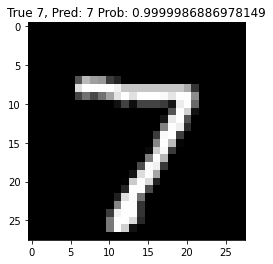

1/1 [==============================] - 0s 20ms/step


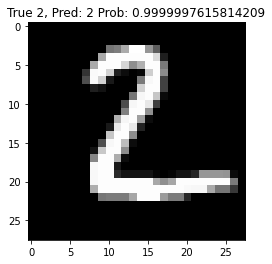

1/1 [==============================] - 0s 14ms/step


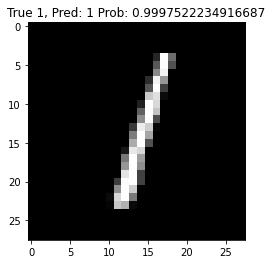

1/1 [==============================] - 0s 15ms/step


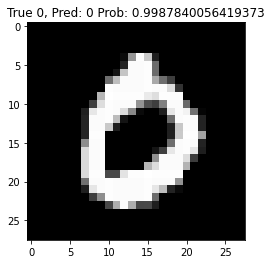

1/1 [==============================] - 0s 14ms/step


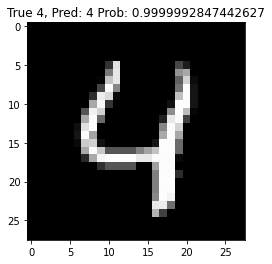

In [77]:
for idx in range(5):
  x = X_test_norm[idx].reshape(1,28,28,1)
  plt.imshow(x.reshape(28,28), cmap='gray')
  pred = model.predict(x)
  pred_class = pred.argmax()
  plt.title(f'True {y_test[idx]}, Pred: {pred_class} Prob: {pred[0][pred_class]}')
  plt.show()

###Save model

In [73]:
model.save('trained model.h5')